# Turning Labels into Surfaces

This notebook reads a label image that contains a segmentation result, converts one of the labeled objects to a surface and exprts it in a file format compatible to be printed by a 3D printer.

In [1]:
import napari
from napari.utils import nbscreenshot
from skimage.io import imread
import napari_process_points_and_surfaces as nppas
from napari_stl_exporter import napari_write_surfaces
import numpy as np

## 1. Read Segmentation Results

In [2]:
label_image = imread("../data/outputs/segmentation_results_nuclei3d.tif")


## 2. Load Label Image to napari

In [3]:
viewer = napari.Viewer()
labels_layer = viewer.add_labels(label_image)
viewer.dims.ndisplay = 3

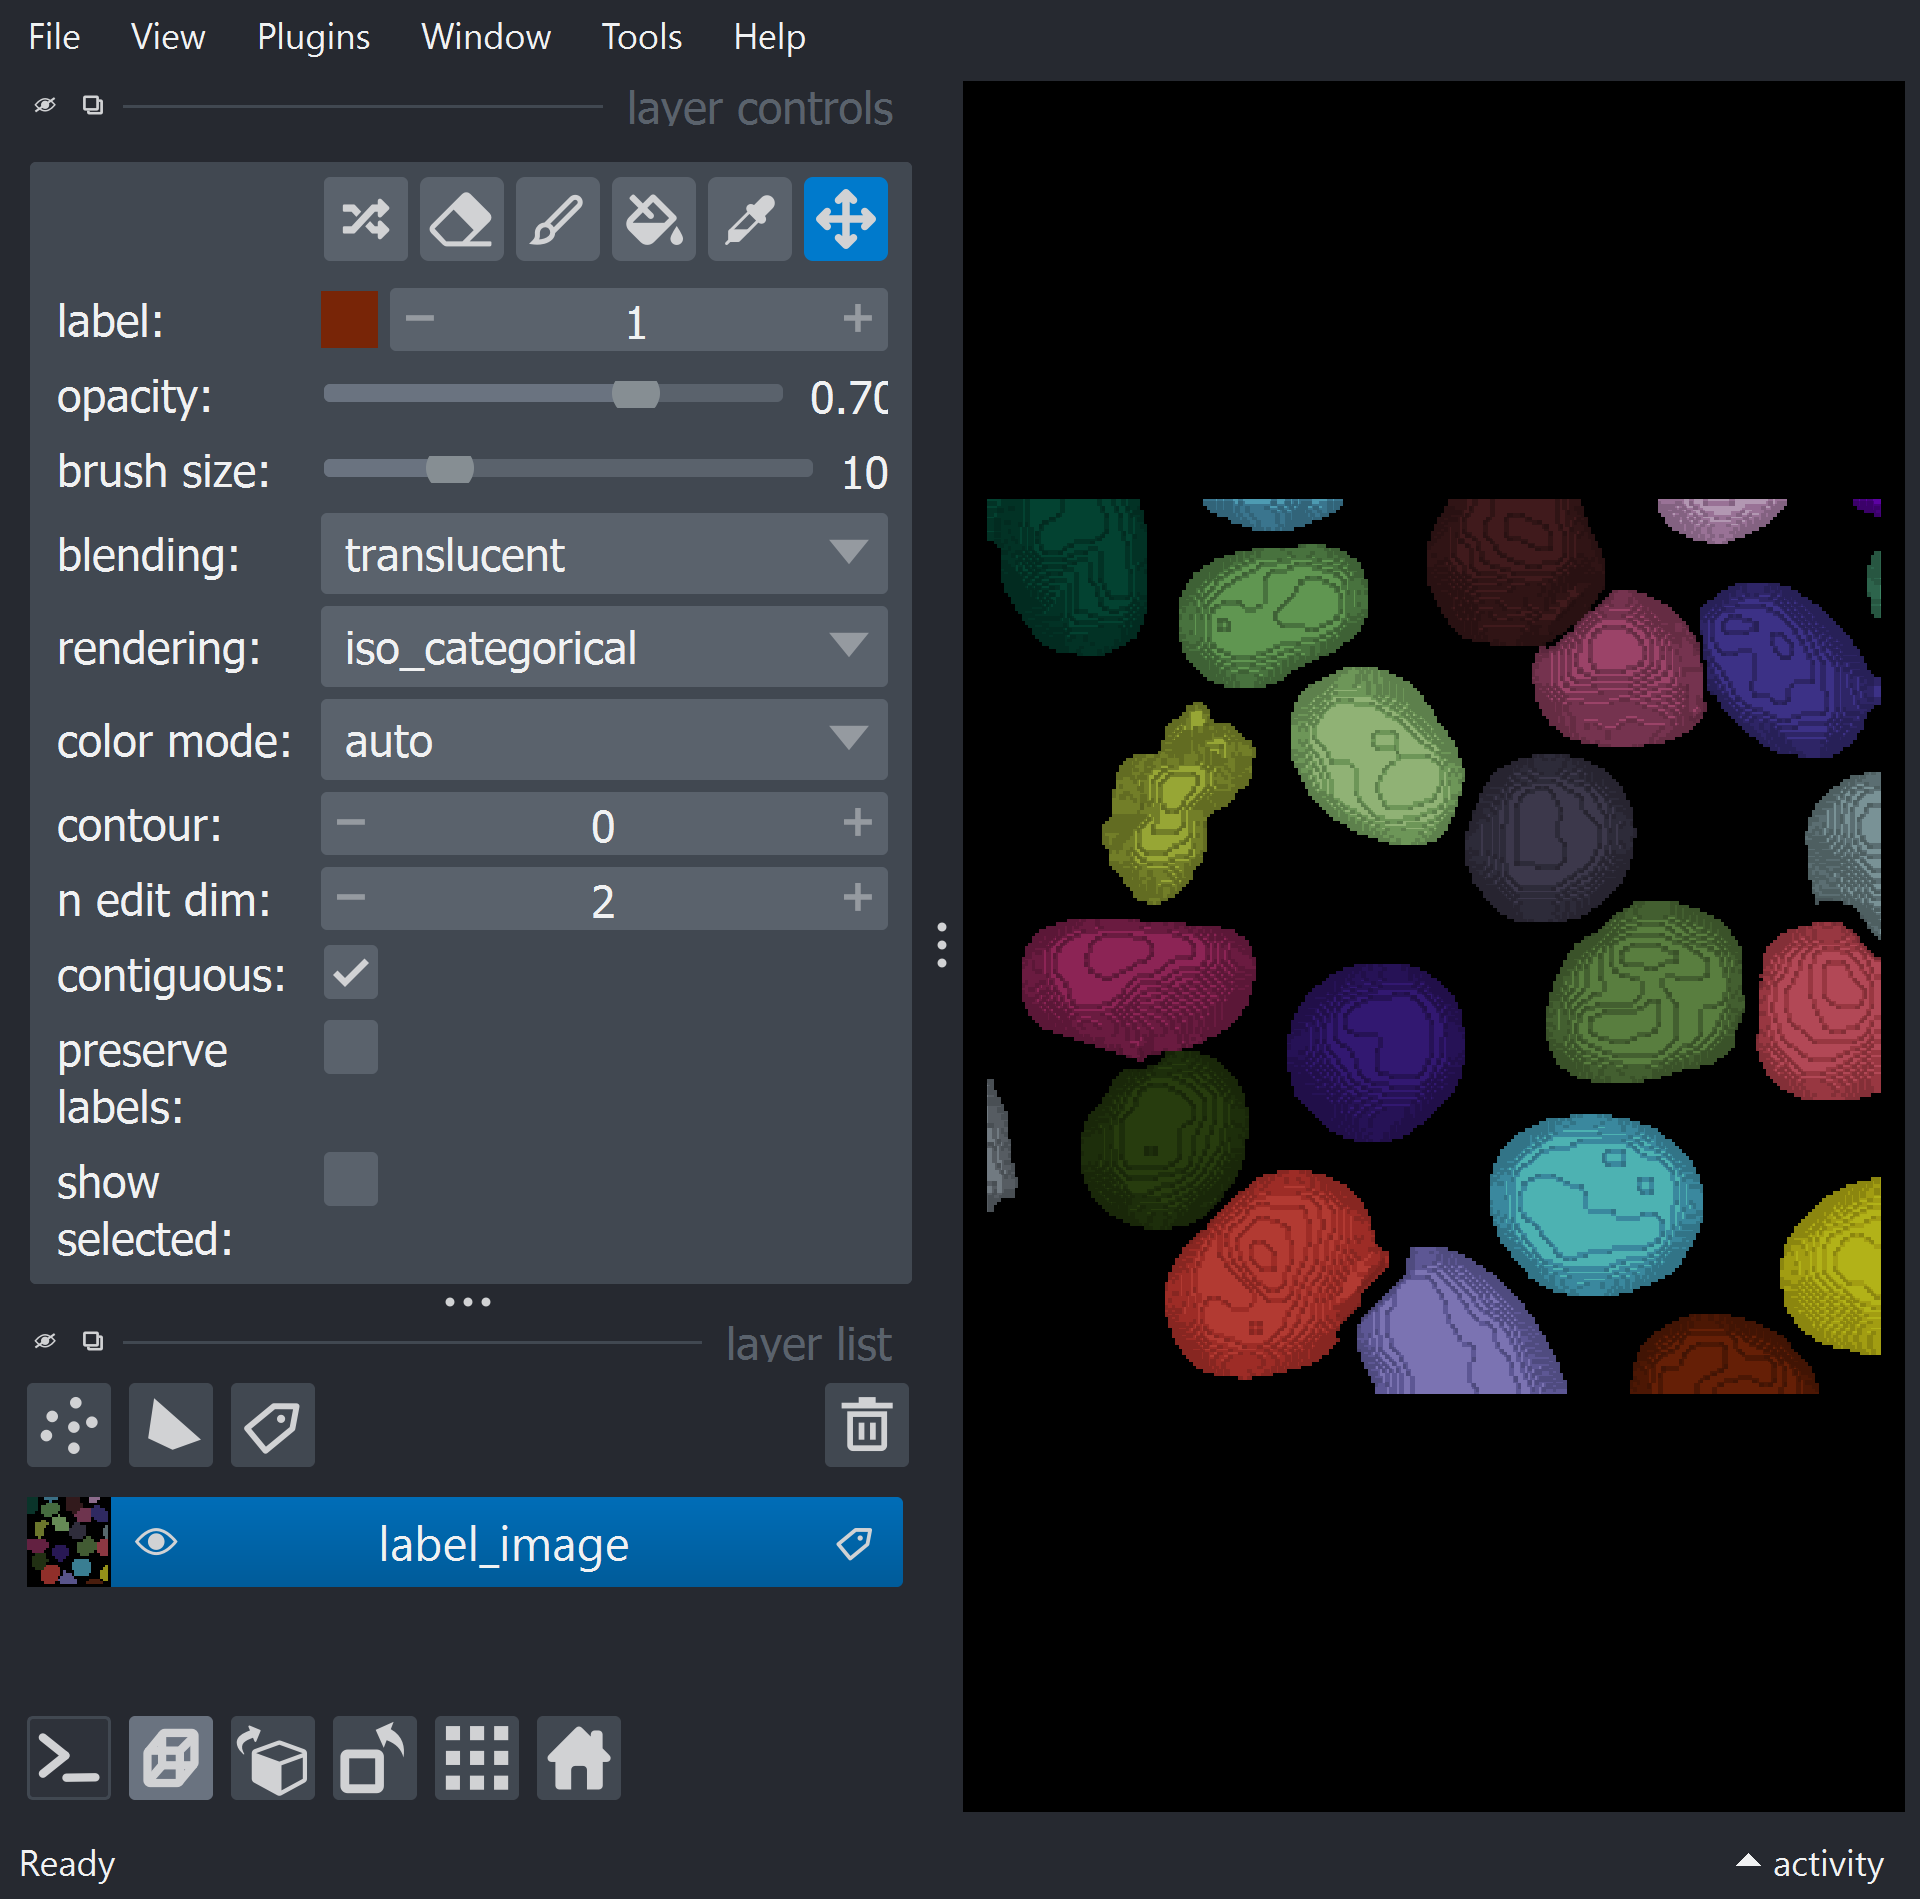

In [4]:
nbscreenshot(viewer)

## 3. Choose a Label
By clicking on `'show selected'` and increasing the `'label'` number, we can visualize individual labels. In the cell below, we chose the label `24`.

In [5]:
labels_layer.selected_label = 24
labels_layer.show_selected_label = True
selected_label = labels_layer.selected_label
selected_label

24

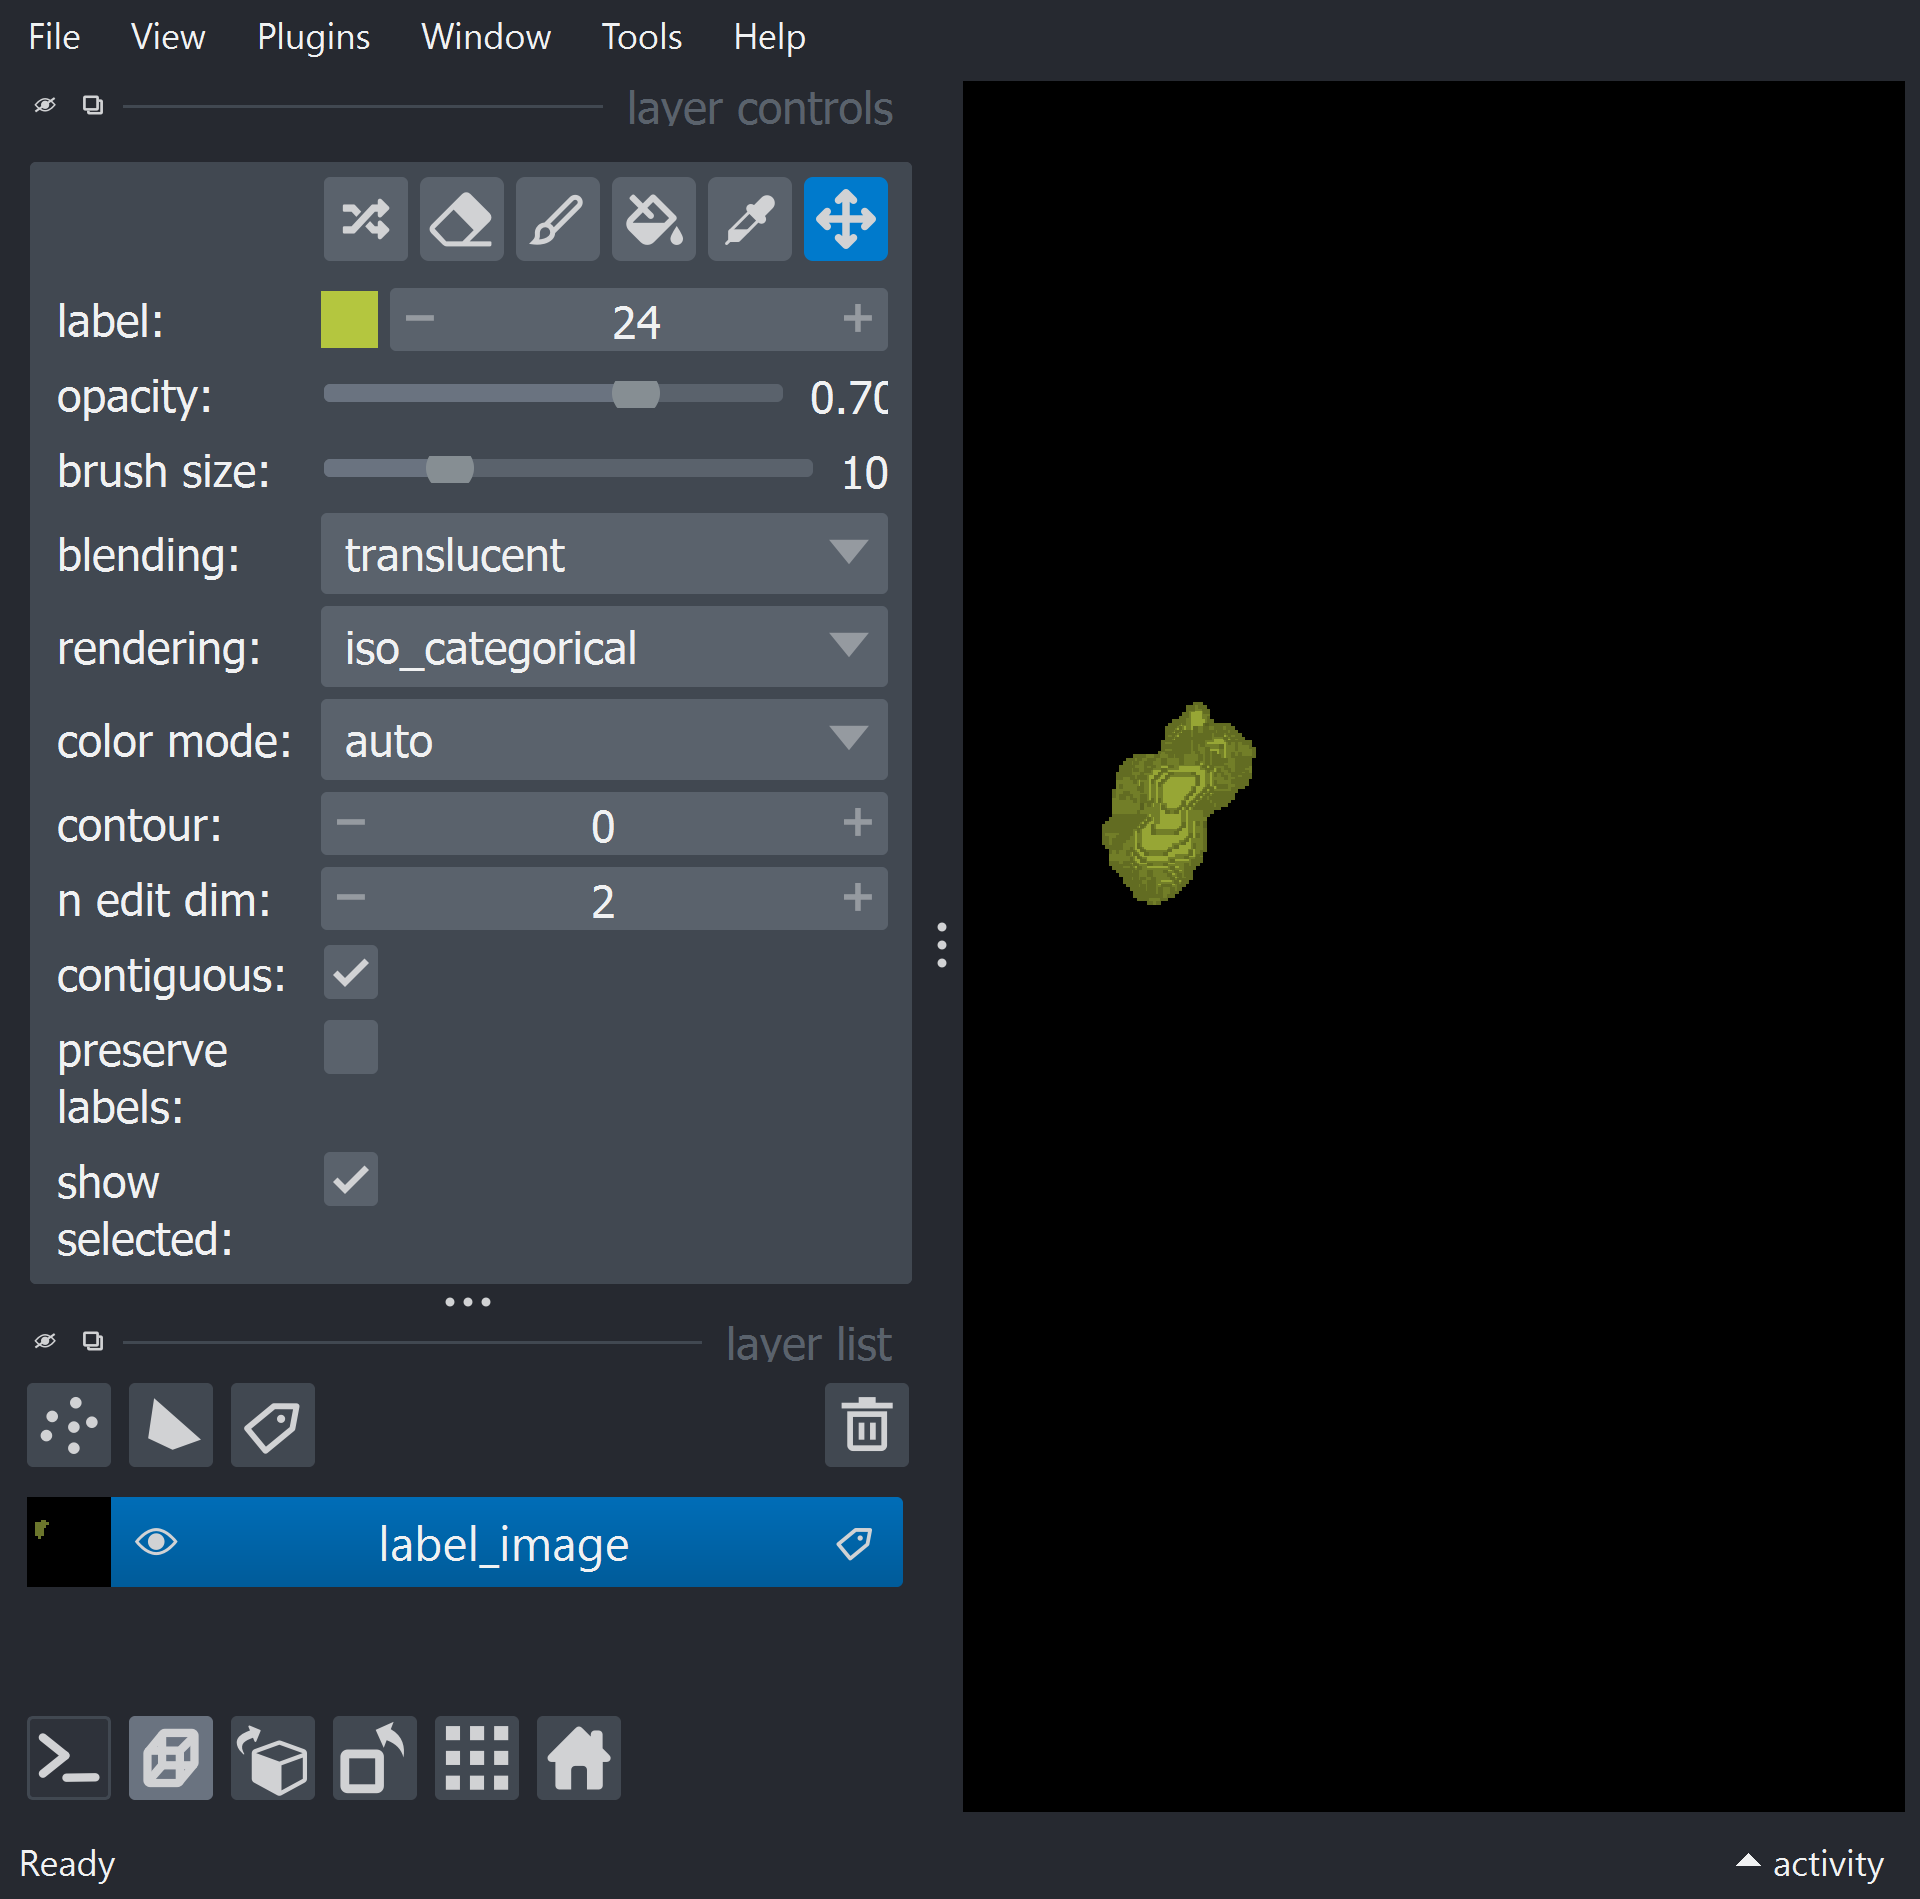

In [6]:
nbscreenshot(viewer)

## 4. Convert Chosen/Selected Label to a Surface
Go to `"Tools > Surfaces > Create surface from any label (marching cubes, scikit-image, nppas)"` (a widget should pop-up on the right side of the screen), insert the label number and click on `Run`.

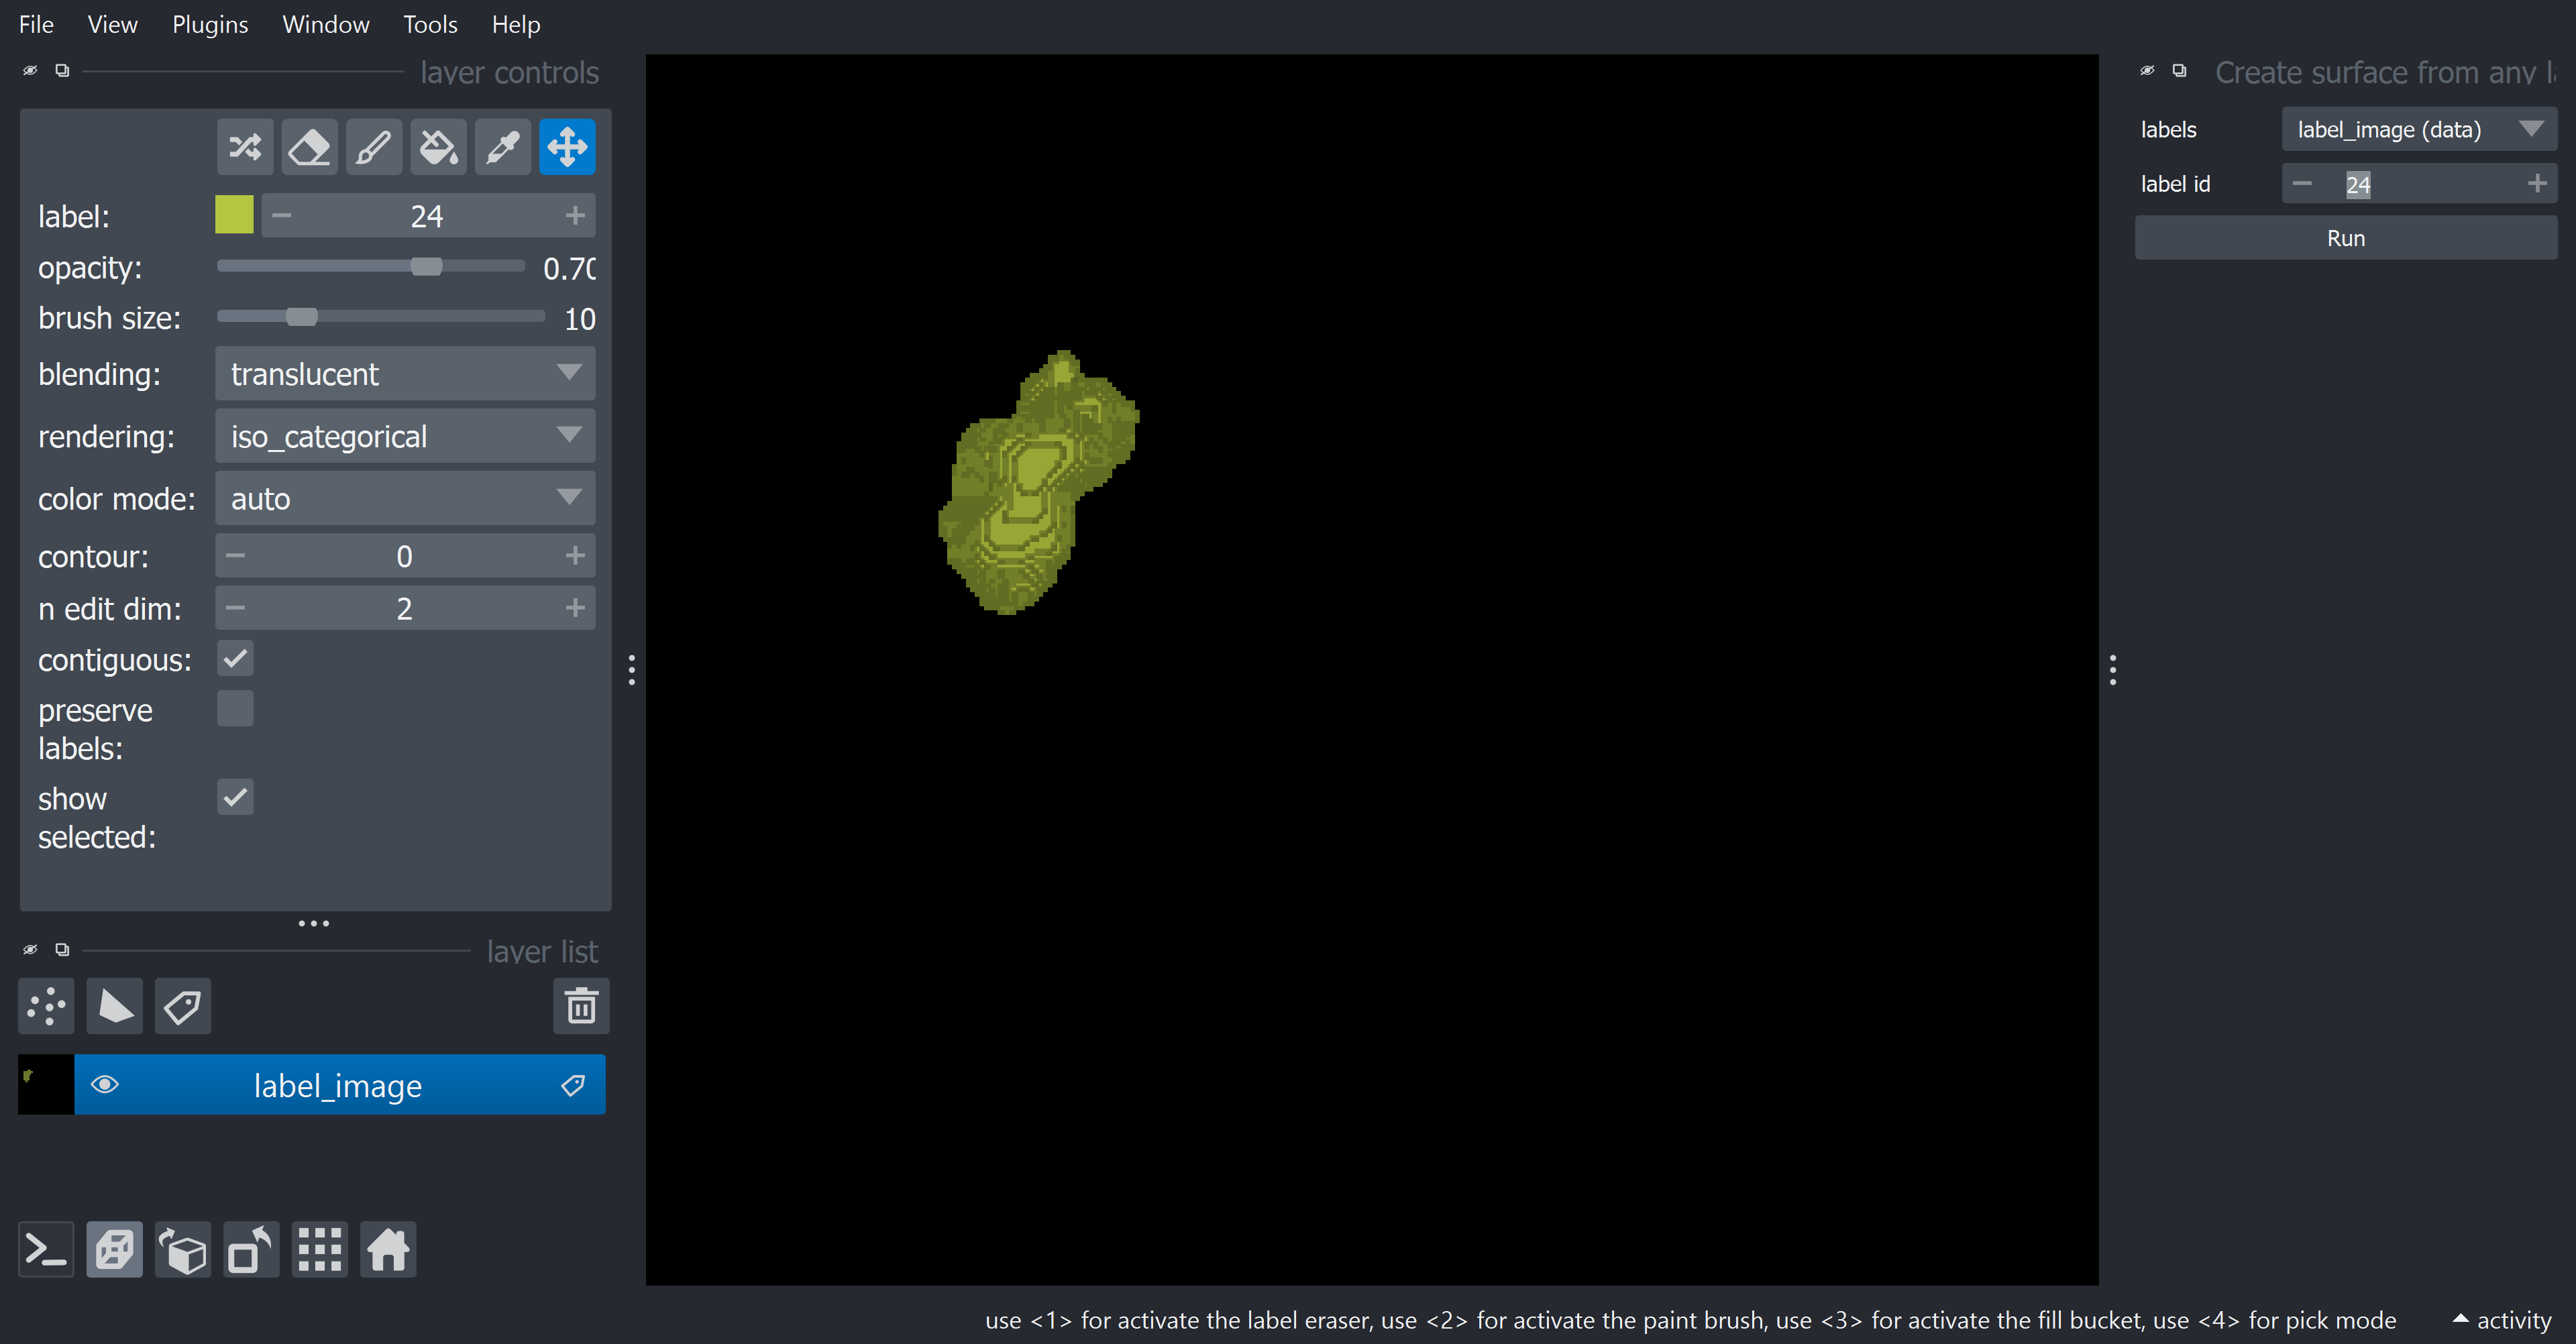

In [8]:
nbscreenshot(viewer)

Alrenatively, run the cell below.

In [12]:
surface = nppas.label_to_surface(label_image, selected_label)
surface_layer = viewer.add_surface(surface, colormap='gray', opacity=0.9)

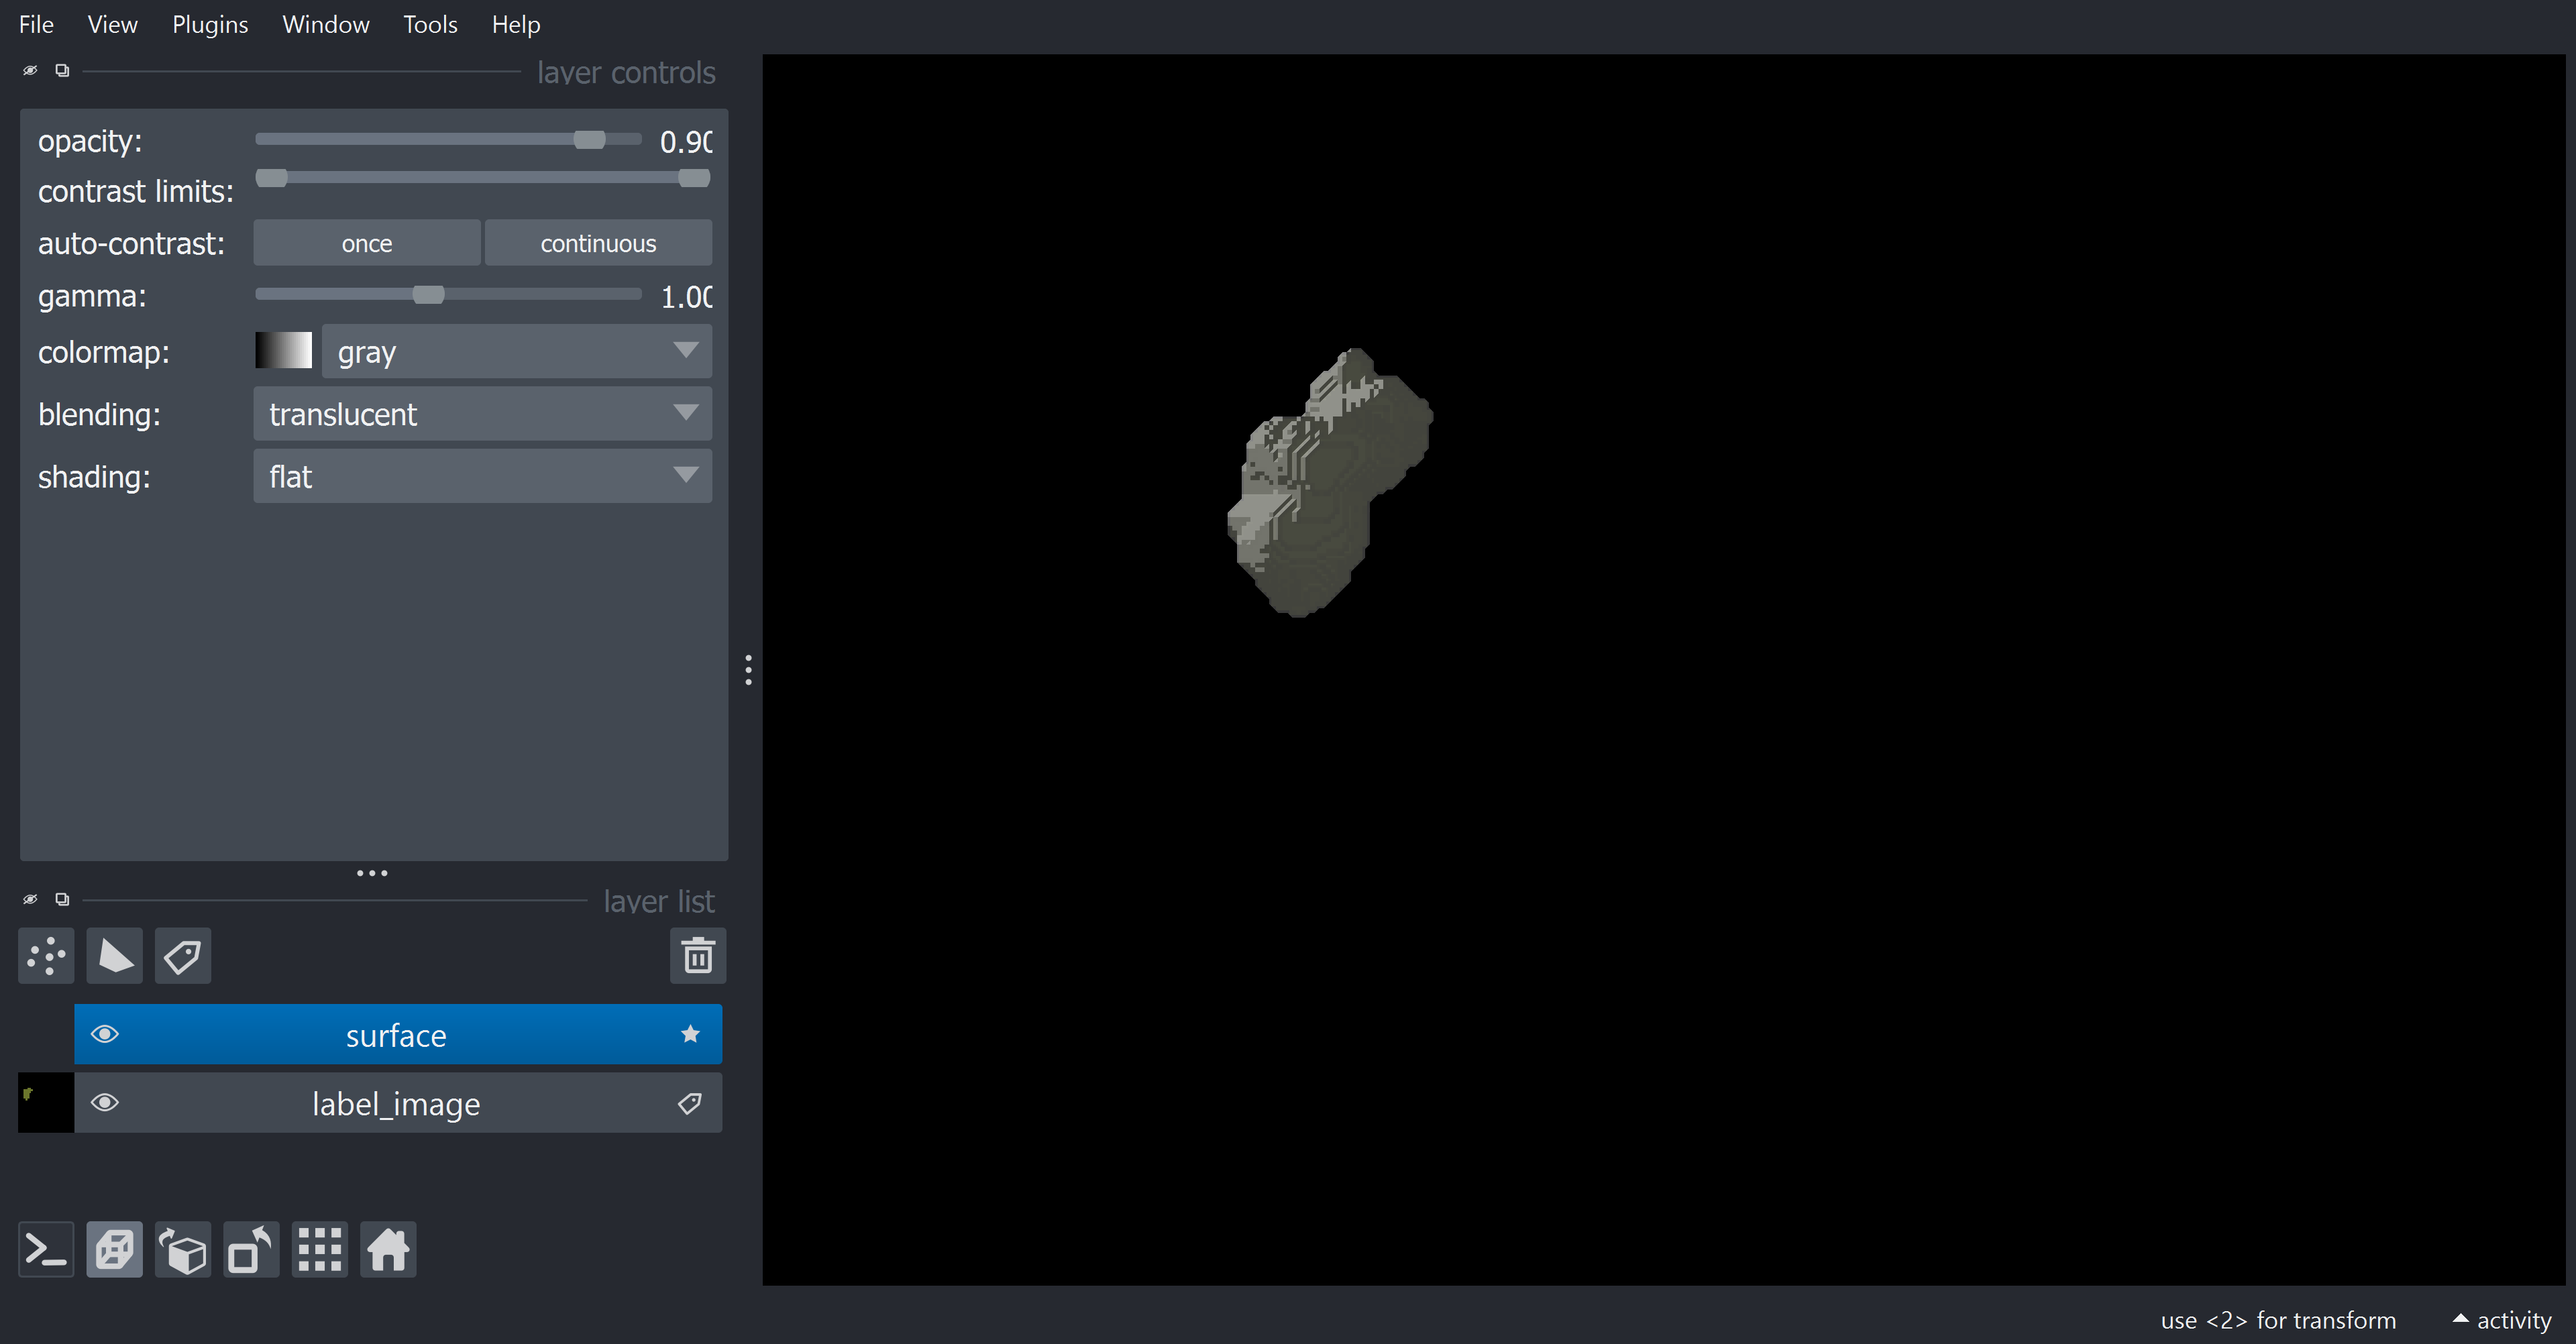

In [13]:
nbscreenshot(viewer)

An alternative to be independent of manually choosing a particular would be to automatically convert the biggest label to a surface. [napari-process-points-and-surfaces](https://github.com/haesleinhuepf/napari-process-points-and-surfaces/#napari-process-points-and-surfaces-nppas) also offers that option:

In [14]:
largest_label_to_surface = nppas.largest_label_to_surface(label_image)
largest_surface_layer = viewer.add_surface(largest_label_to_surface, colormap='red', opacity=0.9)

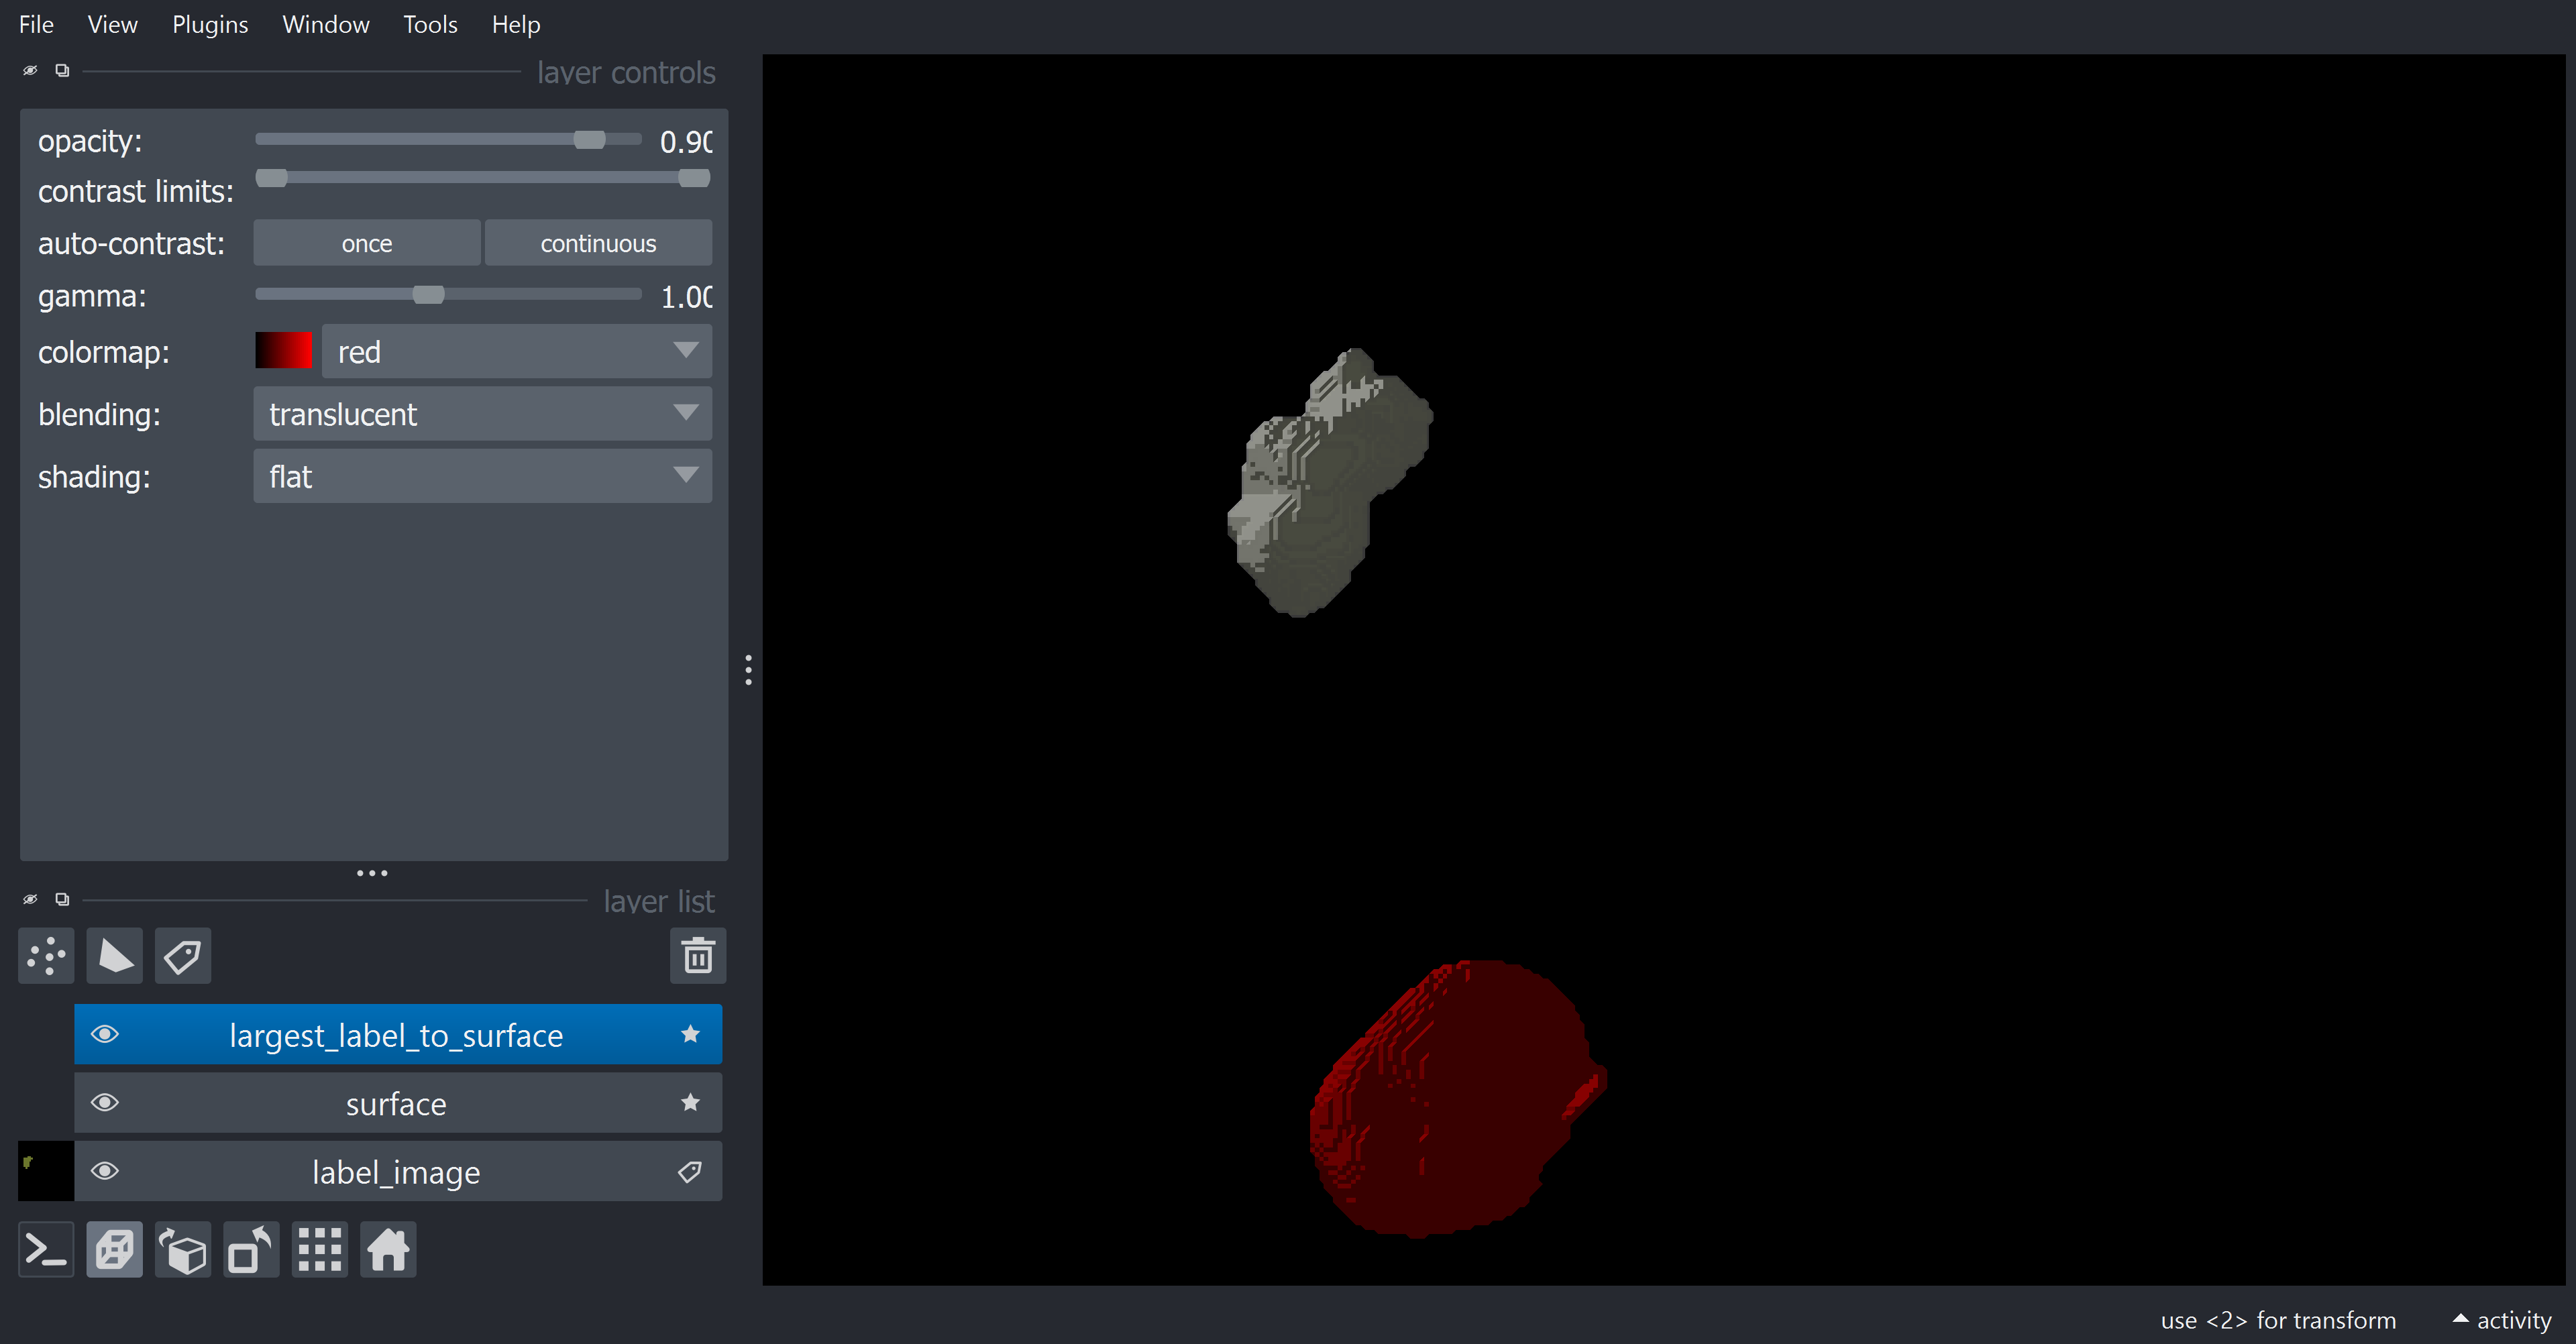

In [15]:
nbscreenshot(viewer)

## 5. Export Surface
Saving this surface in a file format compatible for 3D printing is possible if the [`napari-stl-exporter plugin`](https://github.com/jo-mueller/napari-stl-exporter) is installed. Just select the `Surface Layer` in napari, go to `"File > Save selected layer..."` and save it in one of the availabel file formats (`.stl`, `.ply`, `obj`).

Alternatively, if you created the surface via code above, you can run the cell below to save the layer.

In [16]:
# save the layer as 3D printable file to disc
napari.save_layers("../data/outpus/surface.ply", [surface_layer])

['../data/outpus/surface.ply']

Or

In [17]:
napari_write_surfaces("../data/outpus/surface.ply", largest_label_to_surface, None)

'../data/outpus/surface.ply'

## Package versions used to run this notebook

In [18]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2023-08-03T16:26:37.767330+02:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

napari                            : 0.4.18
napari_process_points_and_surfaces: 0.5.0
numpy                             : 1.23.5

